In [1]:
import sympy as sy

In [10]:
# set up sympy variables
import sympy as sy
t, Me, p, h, w, j, f, Ae, Ap, u, a, b, d, n, V, vmax, Km = sy.symbols("t, Me, p, h, w, j, f, Ae, Ap, u, a, b, d, n, V, vmax, Km")
P, Pm, Pa, Pu, M, E, Em, Ea, Eu = sy.symbols("P, Pm, Pa, Pu, M, E, Em, Ea, Eu")

In [11]:
# substitution into M to get equation for bisection method
# steady states computed previously
steady_states = {P : p*w*(M*a**2*d*h + M*a*d*h*j + a**2*b*f*w + a**2*d*f*w + 2*a*b*f*j*w + 2*a*d*f*j*w + b*f*j**2*w + d*f*j**2*w)/(M*a**2*d*h**2*(M + Me*w)),
                 Pm : p*(M*a*d*h + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w)/(M*a**2*d*h),
                 Pa : p*(M*a*d*h + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w)/(M*a*d*h*u),
                 Pu : p*(M*a*d*h + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w)/(M*a*d*h*n),
                 E : Ap*p*w*(a*b + a*d + b*j + d*j)/(Ae*M*a*d*h),
                 Em : Ap*p*(b + d)/(Ae*a*d),
                 Ea : Ap*p*(b + d)/(Ae*d*u),
                 Eu : Ap*p/(Ae*d)}

# substitutions
dM = -(h/w)*M*((Ap / V)*P + (Ae / V)*E) + (j + u)*((Ae / V)*Em + (Ap / V)*Pm) - vmax*M/(V*(Km + M))  # M 

new_dM = dM.subs(steady_states)
new_dM = sy.simplify(new_dM)
print(new_dM)
new_dM
#sy.solve(new_dM, M)

(-Ap*M*p*(Km + M)*(M*a**2*d*h + M*a*d*h*j + a**2*b*f*w + a**2*d*f*w + 2*a*b*f*j*w + 2*a*d*f*j*w + a*h*(M + Me*w)*(a*b + a*d + b*j + d*j) + b*f*j**2*w + d*f*j**2*w) + Ap*p*(Km + M)*(M + Me*w)*(j + u)*(M*a*d*h + M*a*h*(b + d) + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w) - M**2*a**2*d*h*vmax*(M + Me*w))/(M*V*a**2*d*h*(Km + M)*(M + Me*w))


(-Ap*M*p*(Km + M)*(M*a**2*d*h + M*a*d*h*j + a**2*b*f*w + a**2*d*f*w + 2*a*b*f*j*w + 2*a*d*f*j*w + a*h*(M + Me*w)*(a*b + a*d + b*j + d*j) + b*f*j**2*w + d*f*j**2*w) + Ap*p*(Km + M)*(M + Me*w)*(j + u)*(M*a*d*h + M*a*h*(b + d) + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w) - M**2*a**2*d*h*vmax*(M + Me*w))/(M*V*a**2*d*h*(Km + M)*(M + Me*w))

In [ ]:
# parameters (filled in the ones I think would be the same or similar to Fur4)
p = 8.3e-5 #'' # units mup1 per millisecond (mup1 production rate)
h = 135 #'' # per micromolar per millisecond (methionine binding rate)
w = 32 # unitless (scale factor for pH difference)
j = 100 #'' # per millisecond (methionine unbinding rate)
f = .25 #'' # per millisecond (recycling rate)
Ae = 47 # micrometers^3 (endosomal membrane surface area)
Ap = 314 # micrometers^3 (plasma membrane surface area)
u = 1 # per millisecond (ubiquitination rate)
a = 1e-5 #'' # per micromolar per millisecond (art 1 binding rate)
b = 1 # per millisecond (deubiquitination rate)
d = .002 #'' # per millisecond (degradation rate)
n = 0.1 #'' # per millisecond (endocytosis rate)
V = 523 # micrometers^3 (volume of cytoplasm)
vmax = 174333.33 #'' # micromolars*micrometers^3 per millisecond (maximal rate of methionine metabolism)
Km = 350 #'' # micromolars (methionin michaelis-menten constant)
# vmax = 8.8e3
# Km = 2.5
Me = .1

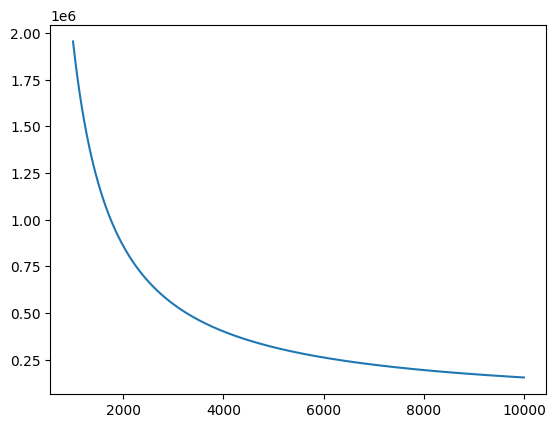

In [17]:
import numpy as np
from matplotlib import pyplot as plt

dM_func = sy.lambdify(M, (-Ap*M*p*(Km + M)*(M*a**2*d*h + M*a*d*h*j + a**2*b*f*w + a**2*d*f*w + 2*a*b*f*j*w + 2*a*d*f*j*w + a*h*(M + Me*w)*(a*b + a*d + b*j + d*j) + b*f*j**2*w + d*f*j**2*w) + Ap*p*(Km + M)*(M + Me*w)*(j + u)*(M*a*d*h + M*a*h*(b + d) + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w) - M**2*a**2*d*h*vmax*(M + Me*w))/(M*V*a**2*d*h*(Km + M)*(M + Me*w)))

# plot dM against M
x_vals = np.linspace(1000, 10000, 1000)
plt.plot(x_vals, dM_func(x_vals))
plt.show()

In [4]:
# numerator = sy.simplify(new_dM * (M*V*a**2*d*h*(Km + M)*(M + Me*w)))
# solutions = sy.solve(numerator, M)
# for sol in solutions:
#     print(sol)

M = -(-3*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**2/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2)/(3*(sy.sqrt(-4*(-3*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**2/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2)**3 + (27*(Ap*Km*Me*a*b*f*j*p*w**2 + Ap*Km*Me*a*b*f*p*u*w**2 + Ap*Km*Me*a*d*f*j*p*w**2 + Ap*Km*Me*a*d*f*p*u*w**2 + Ap*Km*Me*b*f*j**2*p*w**2 + Ap*Km*Me*b*f*j*p*u*w**2 + Ap*Km*Me*d*f*j**2*p*w**2 + Ap*Km*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) - 9*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2 + 2*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**3/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**3)**2)/2 + 27*(Ap*Km*Me*a*b*f*j*p*w**2 + Ap*Km*Me*a*b*f*p*u*w**2 + Ap*Km*Me*a*d*f*j*p*w**2 + Ap*Km*Me*a*d*f*p*u*w**2 + Ap*Km*Me*b*f*j**2*p*w**2 + Ap*Km*Me*b*f*j*p*u*w**2 + Ap*Km*Me*d*f*j**2*p*w**2 + Ap*Km*Me*d*f*j*p*u*w**2)/(2*(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)) - 9*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(2*(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**3/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**3)**(1/3)) - (sy.sqrt(-4*(-3*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**2/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2)**3 + (27*(Ap*Km*Me*a*b*f*j*p*w**2 + Ap*Km*Me*a*b*f*p*u*w**2 + Ap*Km*Me*a*d*f*j*p*w**2 + Ap*Km*Me*a*d*f*p*u*w**2 + Ap*Km*Me*b*f*j**2*p*w**2 + Ap*Km*Me*b*f*j*p*u*w**2 + Ap*Km*Me*d*f*j**2*p*w**2 + Ap*Km*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) - 9*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2 + 2*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**3/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**3)**2)/2 + 27*(Ap*Km*Me*a*b*f*j*p*w**2 + Ap*Km*Me*a*b*f*p*u*w**2 + Ap*Km*Me*a*d*f*j*p*w**2 + Ap*Km*Me*a*d*f*p*u*w**2 + Ap*Km*Me*b*f*j**2*p*w**2 + Ap*Km*Me*b*f*j*p*u*w**2 + Ap*Km*Me*d*f*j**2*p*w**2 + Ap*Km*Me*d*f*j*p*u*w**2)/(2*(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)) - 9*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(2*(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**3/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**3)**(1/3)/3 - (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)/(3*(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax))

In [5]:
## simplifying M
M1 = M

simplifier = sy.cse(M1, optimizations='basic')
print(simplifier)

# Generate the code:
for name, expr in simplifier[0]:
    # If expr refers to another x-variable, wrap in simplify
    expr_str = expr if isinstance(expr, str) else sy.srepr(expr)
    need_simp = 'x' in expr_str
    if need_simp:
        print(f"{name} = sy.simplify({expr})")
    else:
        print(f"{name} = {expr}")

print(f"expr = {simplifier[-1][0]}")

# sol7 = sy.simplify(p*x0*x1*x7/((-x4*x5 + x6)*(-b*x7/(x6 - x5/x3) + b + d)))
# print(sol7)
# print(sy.factor(sol7))

([(x0, a*b), (x1, j*x0), (x2, Ap*p), (x3, f*w), (x4, x2*x3), (x5, a*d), (x6, j*x5), (x7, a**2), (x8, b*x7), (x9, x2*x8), (x10, Km*h), (x11, d*x7), (x12, Me*h), (x13, x11*x12), (x14, 2*x2), (x15, w*x2), (x16, -Ap*Km*a*b*h*p*u - 2*Ap*Km*a*d*h*p*u - Ap*Me*a*b*h*p*u*w - Ap*Me*a*d*h*j*p*w - 2*Ap*Me*a*d*h*p*u*w - Ap*a*b*f*p*u*w - Ap*a*d*f*p*u*w - Ap*b*f*j*p*u*w - Ap*d*f*j*p*u*w + vmax*w*x13 + x1*x4 + x10*x11*x14 + x10*x9 + x11*x4 + x12*x15*x8 + x13*x15 + x3*x9 + x4*x6), (x17, -Ap*b*p*u - 2*Ap*d*p*u + vmax*x5 + x0*x2 + x14*x5), (x18, 1/(a*h)), (x19, x18/x17), (x20, u*x0), (x21, u*x5), (x22, j*u), (x23, b*x22), (x24, d*x22), (x25, j**2), (x26, b*x25), (x27, d*x25), (x28, Km*f), (x29, Me*w**2*x2*x28*(x1 + x20 + x21 + x23 + x24 + x26 + x27 + x6)), (x30, 1/(h**2*x7)), (x31, Km*x12), (x32, Me*x3), (x33, -x1*x28 + x1*x32 - x11*x28 - x11*x31 + x20*x28 + x20*x31 + x20*x32 + x21*x28 + 2*x21*x31 + x21*x32 + x23*x28 + x23*x32 + x24*x28 + x24*x32 + x26*x32 + x27*x32 - x28*x6 - x28*x8 + x31*x6 - x31*x8 + 

In [6]:
# save the substitution expressions
x0 = a*b
x1 = sy.simplify(j*x0)
print("x1 done")
x2 = Ap*p
x3 = f*w
x4 = sy.simplify(x2*x3)
print("x4 done")
x5 = a*d
x6 = sy.simplify(j*x5)
x7 = a**2
x8 = sy.simplify(b*x7)
x9 = sy.simplify(x2*x8)
x10 = Km*h
x11 = sy.simplify(d*x7)
x12 = Me*h
x13 = sy.simplify(x11*x12)
x14 = sy.simplify(2*x2)
x15 = sy.simplify(w*x2)
x16 = sy.simplify(-Ap*Km*a*b*h*p*u - 2*Ap*Km*a*d*h*p*u - Ap*Me*a*b*h*p*u*w - Ap*Me*a*d*h*j*p*w - 2*Ap*Me*a*d*h*p*u*w - Ap*a*b*f*p*u*w - Ap*a*d*f*p*u*w - Ap*b*f*j*p*u*w - Ap*d*f*j*p*u*w + vmax*w*x13 + x1*x4 + x10*x11*x14 + x10*x9 + x11*x4 + x12*x15*x8 + x13*x15 + x3*x9 + x4*x6)
print("x16 done")
x17 = sy.simplify(-Ap*b*p*u - 2*Ap*d*p*u + vmax*x5 + x0*x2 + x14*x5)
print("x17 done")
x18 = 1/(a*h)
x19 = sy.simplify(x18/x17)
print("x19 done")
x20 = sy.simplify(u*x0)
x21 = sy.simplify(u*x5)
x22 = j*u
x23 = sy.simplify(b*x22)
x24 = sy.simplify(d*x22)
x25 = j**2
x26 = sy.simplify(b*x25)
x27 = sy.simplify(d*x25)
x28 = Km*f
x29 = sy.simplify(Me*w**2*x2*x28*(x1 + x20 + x21 + x23 + x24 + x26 + x27 + x6))
print("x29 done")
x30 = sy.simplify(1/(h**2*x7))
x31 = sy.simplify(Km*x12)
x32 = sy.simplify(Me*x3)
x33 = sy.simplify(-x1*x28 + x1*x32 - x11*x28 - x11*x31 + x20*x28 + x20*x31 + x20*x32 + x21*x28 + 2*x21*x31 + x21*x32 + x23*x28 + x23*x32 + x24*x28 + x24*x32 + x26*x32 + x27*x32 - x28*x6 - x28*x8 + x31*x6 - x31*x8 + x32*x6)
print("x33 done")
x34 = sy.simplify(x15*x33)
print("x34 done")
x35 = sy.simplify(-x16)
print("x35 done")
x36 = sy.simplify(-x17)
print("x36 done")
x37 = sy.simplify(x18/x36)
print("x37 done")
x38 = sy.simplify(-3*x15*x33 + x35**2*x37)
print("x38 done")
x39 = sy.simplify(x30/x36**2)
print("x39 done")
x40 = (9*x16*x30*x34/(2*x17**2) - 27*x19*x29/2 + sy.sqrt(x39*(-4*x37*x38**3 + (27*x29 - 9*x34*x35*x37 + 2*x35**3*x39)**2))/2 + x16**3/(a**3*h**3*x17**3))**0.333333333333333
print("x40 done")
print("finished")
expr = -x16*x19/3 - x37*x38/(3*x40) - x40/3
expr


x1 done
x4 done
x16 done
x17 done
x19 done
x29 done
x33 done
x34 done
x35 done
x36 done
x37 done
x38 done
x39 done
x40 done
finished


-(-27*Ap*Km*Me*f*p*w**2*(a*b*j + a*b*u + a*d*j + a*d*u + b*j**2 + b*j*u + d*j**2 + d*j*u)/(2*a*h*(Ap*a*b*p + 2*Ap*a*d*p - Ap*b*p*u - 2*Ap*d*p*u + a*d*vmax)) + Ap*p*w*(9*Ap*Km*a**2*b*h*p + 18*Ap*Km*a**2*d*h*p - 9*Ap*Km*a*b*h*p*u - 18*Ap*Km*a*d*h*p*u + 9*Ap*Me*a**2*b*h*p*w + 9*Ap*Me*a**2*d*h*p*w - 9*Ap*Me*a*b*h*p*u*w - 9*Ap*Me*a*d*h*j*p*w - 18*Ap*Me*a*d*h*p*u*w + 9*Ap*a**2*b*f*p*w + 9*Ap*a**2*d*f*p*w + 9*Ap*a*b*f*j*p*w - 9*Ap*a*b*f*p*u*w + 9*Ap*a*d*f*j*p*w - 9*Ap*a*d*f*p*u*w - 9*Ap*b*f*j*p*u*w - 9*Ap*d*f*j*p*u*w + 9*Me*a**2*d*h*vmax*w)*(-Km*Me*a**2*b*h - Km*Me*a**2*d*h + Km*Me*a*b*h*u + Km*Me*a*d*h*j + 2*Km*Me*a*d*h*u - Km*a**2*b*f - Km*a**2*d*f - Km*a*b*f*j + Km*a*b*f*u - Km*a*d*f*j + Km*a*d*f*u + Km*b*f*j*u + Km*d*f*j*u + Me*a*b*f*j*w + Me*a*b*f*u*w + Me*a*d*f*j*w + Me*a*d*f*u*w + Me*b*f*j**2*w + Me*b*f*j*u*w + Me*d*f*j**2*w + Me*d*f*j*u*w)/(2*a**2*h**2*(Ap*a*b*p + 2*Ap*a*d*p - Ap*b*p*u - 2*Ap*d*p*u + a*d*vmax)**2) + sqrt(((27*Ap*Km*Me*f*p*w**2*(a*b*j + a*b*u + a*d*j + a*d*u + b*j**2 +

In [10]:
new_M = sy.factor(expr)
print(new_M)
new_M

KeyboardInterrupt: 

-12.8059113038584*Me + 5.59829242180743e-7*(5773222577.04038*Me - 354524563635.6*(6.45221125860558e-5*Me + 1)**2 + 4465628.52340599)/(3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926) + sqrt(-1.0*(-0.0162844078216663*Me + (6.45221125860558e-5*Me + 1)**2 - 1.25961047031878e-5)**3 + (3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926))**2))**0.333333333333333 - 198473.217794576*(3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926) + sqrt(-1.0*(-0.0162844078216663*Me + (6.45221125860558e-5*Me + 1)**2 - 1.25961047031878e-5)**3 + (3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.68915

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return -12.8059113038584*Me + 5.59829242180743e-7*(5773222577.04038*Me - 354524563635.6*(6.45221125860558e-5*Me + 1)**2 + 4465628.52340599)*(3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926) + sqrt(-1.0*(-0.0162844078216663*Me + (6.45221125860558e-5*Me + 1)**2 - 1.25961047031878e-5)**3 + (3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926))**2))**(-0.333333333333333) - 198473.217794576*(3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926) + sqrt(-1.0*(-0.0162844078216663*Me + (6.45221125860558e-5*Me + 1)**2 - 1.25961047031878e-5)**3 + (3.07681444100545e-7*Me + (6.45221125860558e-5*M

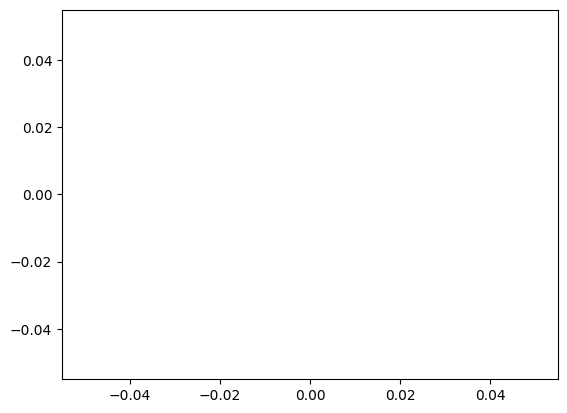

In [8]:
from matplotlib import pyplot as plt
import numpy as np

params = {p:8.3e-5, h:135, w:32, j:100, f:.25, Ae:47, Ap:314, u:1,
                a:1e-5, b:1, d:.002, n:0.1, V:523, vmax:8.8e3, Km:2.5}

dM_params = M1.subs(params)
print(dM_params)

dM_func = sy.lambdify(Me, dM_params)
M_vals = np.linspace(0.01, 1, 100)

print("starting plot")
print(dM_func(.1))
print(dM_func(1))
plt.plot(M_vals, dM_func(M_vals))
# plt.plot(M_vals, np.zeros_like(M_vals))
#plt.ylim(-10, 100000)
plt.show()

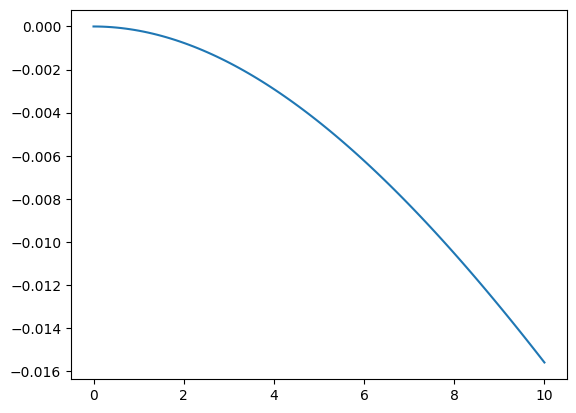

In [20]:
-12.8059113038584*Me + 5.59829242180743e-7*(5773222577.04038*Me - 354524563635.6*(6.45221125860558e-5*Me + 1)**2 + 4465628.52340599)/(3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926) + sy.sqrt(-1.0*(-0.0162844078216663*Me + (6.45221125860558e-5*Me + 1)**2 - 1.25961047031878e-5)**3 + (3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926))**2))**0.333333333333333 - 198473.217794576*(3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926) + sy.sqrt(-1.0*(-0.0162844078216663*Me + (6.45221125860558e-5*Me + 1)**2 - 1.25961047031878e-5)**3 + (3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926))**2))**0.333333333333333 - 198473.217794576

sqrt1 = -1.0*(-0.0162844078216663*Me + (6.45221125860558e-5*Me + 1)**2 - 1.25961047031878e-5)**3 + (3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926))**2
sqrt2 = -1.0*(-0.0162844078216663*Me + (6.45221125860558e-5*Me + 1)**2 - 1.25961047031878e-5)**3 + (3.07681444100545e-7*Me + (6.45221125860558e-5*Me + 1)**3 - 1.92407000034271e-9*(0.0121314880106859*Me + 188.020626176888)*(67520.6891553337*Me + 52.2277309402926))**2

vals = np.linspace(0, 10, 100)
eq = sy.lambdify(Me, sqrt1)
plt.plot(vals, eq(vals))




In [26]:
"""Working with the sqrt from the M steady state function"""

sqrt_symbolic = -4*(-3*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**2/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2)**3 + (27*(Ap*Km*Me*a*b*f*j*p*w**2 + Ap*Km*Me*a*b*f*p*u*w**2 + Ap*Km*Me*a*d*f*j*p*w**2 + Ap*Km*Me*a*d*f*p*u*w**2 + Ap*Km*Me*b*f*j**2*p*w**2 + Ap*Km*Me*b*f*j*p*u*w**2 + Ap*Km*Me*d*f*j**2*p*w**2 + Ap*Km*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) - 9*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2 + 2*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**3/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**3)**2

simplifier = sy.cse(sqrt_symbolic, optimizations='basic')
print(simplifier)

# Generate the code:
for name, expr in simplifier[0]:
    # If expr refers to another x-variable, wrap in simplify
    expr_str = expr if isinstance(expr, str) else sy.srepr(expr)
    need_simp = 'x' in expr_str
    if need_simp:
        print(f"{name} = sy.simplify({expr})")
    else:
        print(f"{name} = {expr}")

print(f"expr = {simplifier[-1][0]}")
sqrt_symbolic

([(x0, a*b), (x1, u*x0), (x2, Km*f), (x3, a*d), (x4, u*x3), (x5, j*u), (x6, b*x5), (x7, d*x5), (x8, j*x0), (x9, j*x3), (x10, Me*h), (x11, Km*x10), (x12, f*w), (x13, Me*x12), (x14, a**2), (x15, b*x14), (x16, d*x14), (x17, j**2), (x18, b*x17), (x19, d*x17), (x20, Ap*p), (x21, w*x20), (x22, x21*(x1*x11 + x1*x13 + x1*x2 - x11*x15 - x11*x16 + 2*x11*x4 + x11*x9 + x13*x18 + x13*x19 + x13*x4 + x13*x6 + x13*x7 + x13*x8 + x13*x9 - x15*x2 - x16*x2 + x2*x4 + x2*x6 + x2*x7 - x2*x8 - x2*x9)), (x23, x12*x20), (x24, x15*x20), (x25, Km*h), (x26, x10*x16), (x27, 2*x20), (x28, x25*x27), (x29, x10*x21), (x30, vmax*w*x26 - w*x10*x27*x4 - x1*x20*x25 - x1*x23 - x1*x29 + x12*x24 + x15*x29 + x16*x23 + x16*x28 + x21*x26 - x23*x4 - x23*x6 - x23*x7 + x23*x8 + x23*x9 + x24*x25 - x28*x4 - x29*x9), (x31, u*x20), (x32, -b*x31 - 2*d*x31 + vmax*x3 + x0*x20 + x27*x3), (x33, 1/(a*h*x32)), (x34, 1/(h**2*x14*x32**2))], [x34*(-4*x33*(3*x22 + x30**2*x33)**3 + (-27*Me*w**2*x2*x20*(x1 + x18 + x19 + x4 + x6 + x7 + x8 + x9) + 9*

-4*((3*Ap*Km*Me*a**2*b*h*p*w + 3*Ap*Km*Me*a**2*d*h*p*w - 3*Ap*Km*Me*a*b*h*p*u*w - 3*Ap*Km*Me*a*d*h*j*p*w - 6*Ap*Km*Me*a*d*h*p*u*w + 3*Ap*Km*a**2*b*f*p*w + 3*Ap*Km*a**2*d*f*p*w + 3*Ap*Km*a*b*f*j*p*w - 3*Ap*Km*a*b*f*p*u*w + 3*Ap*Km*a*d*f*j*p*w - 3*Ap*Km*a*d*f*p*u*w - 3*Ap*Km*b*f*j*p*u*w - 3*Ap*Km*d*f*j*p*u*w - 3*Ap*Me*a*b*f*j*p*w**2 - 3*Ap*Me*a*b*f*p*u*w**2 - 3*Ap*Me*a*d*f*j*p*w**2 - 3*Ap*Me*a*d*f*p*u*w**2 - 3*Ap*Me*b*f*j**2*p*w**2 - 3*Ap*Me*b*f*j*p*u*w**2 - 3*Ap*Me*d*f*j**2*p*w**2 - 3*Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**2/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d

In [31]:
x0 = a*b
x1 = sy.simplify(u*x0)
x2 = Km*f
x3 = a*d
x4 = sy.simplify(u*x3)
x5 = j*u
x6 = sy.simplify(b*x5)
x7 = sy.simplify(d*x5)
x8 = sy.simplify(j*x0)
x9 = sy.simplify(j*x3)
x10 = Me*h
x11 = sy.simplify(Km*x10)
x12 = f*w
x13 = sy.simplify(Me*x12)
x14 = a**2
x15 = sy.simplify(b*x14)
x16 = sy.simplify(d*x14)
x17 = j**2
x18 = sy.simplify(b*x17)
x19 = sy.simplify(d*x17)
x20 = Ap*p
x21 = sy.simplify(w*x20)
x22 = sy.simplify(x21*(x1*x11 + x1*x13 + x1*x2 - x11*x15 - x11*x16 + 2*x11*x4 + x11*x9 + x13*x18 + x13*x19 + x13*x4 + x13*x6 + x13*x7 + x13*x8 + x13*x9 - x15*x2 - x16*x2 + x2*x4 + x2*x6 + x2*x7 - x2*x8 - x2*x9))
x23 = sy.simplify(x12*x20)
x24 = sy.simplify(x15*x20)
x25 = Km*h
x26 = sy.simplify(x10*x16)
x27 = sy.simplify(2*x20)
x28 = sy.simplify(x25*x27)
x29 = sy.simplify(x10*x21)
x30 = sy.simplify(vmax*w*x26 - w*x10*x27*x4 - x1*x20*x25 - x1*x23 - x1*x29 + x12*x24 + x15*x29 + x16*x23 + x16*x28 + x21*x26 - x23*x4 - x23*x6 - x23*x7 + x23*x8 + x23*x9 + x24*x25 - x28*x4 - x29*x9)
x31 = sy.simplify(u*x20)
x32 = sy.simplify(-b*x31 - 2*d*x31 + vmax*x3 + x0*x20 + x27*x3)
x33 = sy.simplify(1/(a*h*x32))
x34 = sy.simplify(1/(h**2*x14*x32**2))
eq = x34*(-4*x33*(3*x22 + x30**2*x33)**3 + (-27*Me*w**2*x2*x20*(x1 + x18 + x19 + x4 + x6 + x7 + x8 + x9) + 9*x22*x30*x33 + 2*x30**3*x34)**2)
print(eq)

((-27*Ap*Km*Me*f*p*w**2*(a*b*j + a*b*u + a*d*j + a*d*u + b*j**2 + b*j*u + d*j**2 + d*j*u) + 9*Ap*p*w*(Ap*Km*a**2*b*h*p + 2*Ap*Km*a**2*d*h*p - Ap*Km*a*b*h*p*u - 2*Ap*Km*a*d*h*p*u + Ap*Me*a**2*b*h*p*w + Ap*Me*a**2*d*h*p*w - Ap*Me*a*b*h*p*u*w - Ap*Me*a*d*h*j*p*w - 2*Ap*Me*a*d*h*p*u*w + Ap*a**2*b*f*p*w + Ap*a**2*d*f*p*w + Ap*a*b*f*j*p*w - Ap*a*b*f*p*u*w + Ap*a*d*f*j*p*w - Ap*a*d*f*p*u*w - Ap*b*f*j*p*u*w - Ap*d*f*j*p*u*w + Me*a**2*d*h*vmax*w)*(-Km*Me*a**2*b*h - Km*Me*a**2*d*h + Km*Me*a*b*h*u + Km*Me*a*d*h*j + 2*Km*Me*a*d*h*u - Km*a**2*b*f - Km*a**2*d*f - Km*a*b*f*j + Km*a*b*f*u - Km*a*d*f*j + Km*a*d*f*u + Km*b*f*j*u + Km*d*f*j*u + Me*a*b*f*j*w + Me*a*b*f*u*w + Me*a*d*f*j*w + Me*a*d*f*u*w + Me*b*f*j**2*w + Me*b*f*j*u*w + Me*d*f*j**2*w + Me*d*f*j*u*w)/(a*h*(Ap*a*b*p + 2*Ap*a*d*p - Ap*b*p*u - 2*Ap*d*p*u + a*d*vmax)) + 2*(Ap*Km*a**2*b*h*p + 2*Ap*Km*a**2*d*h*p - Ap*Km*a*b*h*p*u - 2*Ap*Km*a*d*h*p*u + Ap*Me*a**2*b*h*p*w + Ap*Me*a**2*d*h*p*w - Ap*Me*a*b*h*p*u*w - Ap*Me*a*d*h*j*p*w - 2*Ap*Me*a*d*h*p

In [32]:
simplifier = sy.cse(eq, optimizations='basic')
print(simplifier)

# Generate the code:
for name, expr in simplifier[0]:
    # If expr refers to another x-variable, wrap in simplify
    expr_str = expr if isinstance(expr, str) else sy.srepr(expr)
    need_simp = 'x' in expr_str
    if need_simp:
        print(f"{name} = sy.simplify({expr})")
    else:
        print(f"{name} = {expr}")

print(f"expr = {simplifier[-1][0]}")

([(x0, a*b), (x1, u*x0), (x2, Km*f), (x3, a*d), (x4, u*x3), (x5, j*u), (x6, b*x5), (x7, d*x5), (x8, j*x0), (x9, j*x3), (x10, Me*h), (x11, Km*x10), (x12, f*w), (x13, Me*x12), (x14, a**2), (x15, b*x14), (x16, d*x14), (x17, j**2), (x18, b*x17), (x19, d*x17), (x20, Ap*p), (x21, w*x20), (x22, x21*(x1*x11 + x1*x13 + x1*x2 - x11*x15 - x11*x16 + 2*x11*x4 + x11*x9 + x13*x18 + x13*x19 + x13*x4 + x13*x6 + x13*x7 + x13*x8 + x13*x9 - x15*x2 - x16*x2 + x2*x4 + x2*x6 + x2*x7 - x2*x8 - x2*x9)), (x23, x12*x20), (x24, x15*x20), (x25, Km*h), (x26, x10*x16), (x27, 2*x20), (x28, x25*x27), (x29, x10*x21), (x30, vmax*w*x26 - w*x10*x27*x4 - x1*x20*x25 - x1*x23 - x1*x29 + x12*x24 + x15*x29 + x16*x23 + x16*x28 + x21*x26 - x23*x4 - x23*x6 - x23*x7 + x23*x8 + x23*x9 + x24*x25 - x28*x4 - x29*x9), (x31, u*x20), (x32, -b*x31 - 2*d*x31 + vmax*x3 + x0*x20 + x27*x3), (x33, 1/(a*h*x32)), (x34, 1/(h**2*x14*x32**2))], [x34*(-4*x33*(3*x22 + x30**2*x33)**3 + (-27*Me*w**2*x2*x20*(x1 + x18 + x19 + x4 + x6 + x7 + x8 + x9) + 9*

In [34]:
x0 = a*b
x1 = sy.simplify(u*x0)
x2 = Km*f
x3 = a*d
x4 = sy.simplify(u*x3)
x5 = j*u
x6 = sy.simplify(b*x5)
x7 = sy.simplify(d*x5)
x8 = sy.simplify(j*x0)
x9 = sy.simplify(j*x3)
x10 = Me*h
x11 = sy.simplify(Km*x10)
x12 = f*w
x13 = sy.simplify(Me*x12)
x14 = a**2
x15 = sy.simplify(b*x14)
x16 = sy.simplify(d*x14)
x17 = j**2
x18 = sy.simplify(b*x17)
x19 = sy.simplify(d*x17)
x20 = Ap*p
x21 = sy.simplify(w*x20)
x22 = sy.simplify(x21*(x1*x11 + x1*x13 + x1*x2 - x11*x15 - x11*x16 + 2*x11*x4 + x11*x9 + x13*x18 + x13*x19 + x13*x4 + x13*x6 + x13*x7 + x13*x8 + x13*x9 - x15*x2 - x16*x2 + x2*x4 + x2*x6 + x2*x7 - x2*x8 - x2*x9))
x23 = sy.simplify(x12*x20)
x24 = sy.simplify(x15*x20)
x25 = Km*h
x26 = sy.simplify(x10*x16)
x27 = sy.simplify(2*x20)
x28 = sy.simplify(x25*x27)
x29 = sy.simplify(x10*x21)
x30 = sy.simplify(vmax*w*x26 - w*x10*x27*x4 - x1*x20*x25 - x1*x23 - x1*x29 + x12*x24 + x15*x29 + x16*x23 + x16*x28 + x21*x26 - x23*x4 - x23*x6 - x23*x7 + x23*x8 + x23*x9 + x24*x25 - x28*x4 - x29*x9)
x31 = sy.simplify(u*x20)
x32 = sy.simplify(-b*x31 - 2*d*x31 + vmax*x3 + x0*x20 + x27*x3)
x33 = sy.simplify(1/(a*h*x32))
x34 = sy.simplify(1/(h**2*x14*x32**2))
expr = x34*(-4*x33*(3*x22 + x30**2*x33)**3 + (-27*Me*w**2*x2*x20*(x1 + x18 + x19 + x4 + x6 + x7 + x8 + x9) + 9*x22*x30*x33 + 2*x30**3*x34)**2)
print(expr)
expr*(a**2*h**2*(Ap*a*b*p + 2*Ap*a*d*p - Ap*b*p*u - 2*Ap*d*p*u + a*d*vmax)**2)

((-27*Ap*Km*Me*f*p*w**2*(a*b*j + a*b*u + a*d*j + a*d*u + b*j**2 + b*j*u + d*j**2 + d*j*u) + 9*Ap*p*w*(Ap*Km*a**2*b*h*p + 2*Ap*Km*a**2*d*h*p - Ap*Km*a*b*h*p*u - 2*Ap*Km*a*d*h*p*u + Ap*Me*a**2*b*h*p*w + Ap*Me*a**2*d*h*p*w - Ap*Me*a*b*h*p*u*w - Ap*Me*a*d*h*j*p*w - 2*Ap*Me*a*d*h*p*u*w + Ap*a**2*b*f*p*w + Ap*a**2*d*f*p*w + Ap*a*b*f*j*p*w - Ap*a*b*f*p*u*w + Ap*a*d*f*j*p*w - Ap*a*d*f*p*u*w - Ap*b*f*j*p*u*w - Ap*d*f*j*p*u*w + Me*a**2*d*h*vmax*w)*(-Km*Me*a**2*b*h - Km*Me*a**2*d*h + Km*Me*a*b*h*u + Km*Me*a*d*h*j + 2*Km*Me*a*d*h*u - Km*a**2*b*f - Km*a**2*d*f - Km*a*b*f*j + Km*a*b*f*u - Km*a*d*f*j + Km*a*d*f*u + Km*b*f*j*u + Km*d*f*j*u + Me*a*b*f*j*w + Me*a*b*f*u*w + Me*a*d*f*j*w + Me*a*d*f*u*w + Me*b*f*j**2*w + Me*b*f*j*u*w + Me*d*f*j**2*w + Me*d*f*j*u*w)/(a*h*(Ap*a*b*p + 2*Ap*a*d*p - Ap*b*p*u - 2*Ap*d*p*u + a*d*vmax)) + 2*(Ap*Km*a**2*b*h*p + 2*Ap*Km*a**2*d*h*p - Ap*Km*a*b*h*p*u - 2*Ap*Km*a*d*h*p*u + Ap*Me*a**2*b*h*p*w + Ap*Me*a**2*d*h*p*w - Ap*Me*a*b*h*p*u*w - Ap*Me*a*d*h*j*p*w - 2*Ap*Me*a*d*h*p

(-27*Ap*Km*Me*f*p*w**2*(a*b*j + a*b*u + a*d*j + a*d*u + b*j**2 + b*j*u + d*j**2 + d*j*u) + 9*Ap*p*w*(Ap*Km*a**2*b*h*p + 2*Ap*Km*a**2*d*h*p - Ap*Km*a*b*h*p*u - 2*Ap*Km*a*d*h*p*u + Ap*Me*a**2*b*h*p*w + Ap*Me*a**2*d*h*p*w - Ap*Me*a*b*h*p*u*w - Ap*Me*a*d*h*j*p*w - 2*Ap*Me*a*d*h*p*u*w + Ap*a**2*b*f*p*w + Ap*a**2*d*f*p*w + Ap*a*b*f*j*p*w - Ap*a*b*f*p*u*w + Ap*a*d*f*j*p*w - Ap*a*d*f*p*u*w - Ap*b*f*j*p*u*w - Ap*d*f*j*p*u*w + Me*a**2*d*h*vmax*w)*(-Km*Me*a**2*b*h - Km*Me*a**2*d*h + Km*Me*a*b*h*u + Km*Me*a*d*h*j + 2*Km*Me*a*d*h*u - Km*a**2*b*f - Km*a**2*d*f - Km*a*b*f*j + Km*a*b*f*u - Km*a*d*f*j + Km*a*d*f*u + Km*b*f*j*u + Km*d*f*j*u + Me*a*b*f*j*w + Me*a*b*f*u*w + Me*a*d*f*j*w + Me*a*d*f*u*w + Me*b*f*j**2*w + Me*b*f*j*u*w + Me*d*f*j**2*w + Me*d*f*j*u*w)/(a*h*(Ap*a*b*p + 2*Ap*a*d*p - Ap*b*p*u - 2*Ap*d*p*u + a*d*vmax)) + 2*(Ap*Km*a**2*b*h*p + 2*Ap*Km*a**2*d*h*p - Ap*Km*a*b*h*p*u - 2*Ap*Km*a*d*h*p*u + Ap*Me*a**2*b*h*p*w + Ap*Me*a**2*d*h*p*w - Ap*Me*a*b*h*p*u*w - Ap*Me*a*d*h*j*p*w - 2*Ap*Me*a*d*h*p*

In [ ]:
root = ((-27*Ap*Km*Me*f*p*w**2*(a*b*j + a*b*u + a*d*j + a*d*u + b*j**2 + b*j*u + d*j**2 + d*j*u) + 9*Ap*p*w*(Ap*Km*a**2*b*h*p + 2*Ap*Km*a**2*d*h*p - Ap*Km*a*b*h*p*u - 2*Ap*Km*a*d*h*p*u + Ap*Me*a**2*b*h*p*w + Ap*Me*a**2*d*h*p*w - Ap*Me*a*b*h*p*u*w - Ap*Me*a*d*h*j*p*w - 2*Ap*Me*a*d*h*p*u*w + Ap*a**2*b*f*p*w + Ap*a**2*d*f*p*w + Ap*a*b*f*j*p*w - Ap*a*b*f*p*u*w + Ap*a*d*f*j*p*w - Ap*a*d*f*p*u*w - Ap*b*f*j*p*u*w - Ap*d*f*j*p*u*w + Me*a**2*d*h*vmax*w)*(-Km*Me*a**2*b*h - Km*Me*a**2*d*h + Km*Me*a*b*h*u + Km*Me*a*d*h*j + 2*Km*Me*a*d*h*u - Km*a**2*b*f - Km*a**2*d*f - Km*a*b*f*j + Km*a*b*f*u - Km*a*d*f*j + Km*a*d*f*u + Km*b*f*j*u + Km*d*f*j*u + Me*a*b*f*j*w + Me*a*b*f*u*w + Me*a*d*f*j*w + Me*a*d*f*u*w + Me*b*f*j**2*w + Me*b*f*j*u*w + Me*d*f*j**2*w + Me*d*f*j*u*w)/(a*h*(Ap*a*b*p + 2*Ap*a*d*p - Ap*b*p*u - 2*Ap*d*p*u + a*d*vmax)) + 2*(Ap*Km*a**2*b*h*p + 2*Ap*Km*a**2*d*h*p - Ap*Km*a*b*h*p*u - 2*Ap*Km*a*d*h*p*u + Ap*Me*a**2*b*h*p*w + Ap*Me*a**2*d*h*p*w - Ap*Me*a*b*h*p*u*w - Ap*Me*a*d*h*j*p*w - 2*Ap*Me*a*d*h*p*u*w + Ap*a**2*b*f*p*w + Ap*a**2*d*f*p*w + Ap*a*b*f*j*p*w - Ap*a*b*f*p*u*w + Ap*a*d*f*j*p*w - Ap*a*d*f*p*u*w - Ap*b*f*j*p*u*w - Ap*d*f*j*p*u*w + Me*a**2*d*h*vmax*w)**3/(a**2*h**2*(Ap*a*b*p + 2*Ap*a*d*p - Ap*b*p*u - 2*Ap*d*p*u + a*d*vmax)**2))**2 - 4*(3*Ap*p*w*(-Km*Me*a**2*b*h - Km*Me*a**2*d*h + Km*Me*a*b*h*u + Km*Me*a*d*h*j + 2*Km*Me*a*d*h*u - Km*a**2*b*f - Km*a**2*d*f - Km*a*b*f*j + Km*a*b*f*u - Km*a*d*f*j + Km*a*d*f*u + Km*b*f*j*u + Km*d*f*j*u + Me*a*b*f*j*w + Me*a*b*f*u*w + Me*a*d*f*j*w + Me*a*d*f*u*w + Me*b*f*j**2*w + Me*b*f*j*u*w + Me*d*f*j**2*w + Me*d*f*j*u*w) + (Ap*Km*a**2*b*h*p + 2*Ap*Km*a**2*d*h*p - Ap*Km*a*b*h*p*u - 2*Ap*Km*a*d*h*p*u + Ap*Me*a**2*b*h*p*w + Ap*Me*a**2*d*h*p*w - Ap*Me*a*b*h*p*u*w - Ap*Me*a*d*h*j*p*w - 2*Ap*Me*a*d*h*p*u*w + Ap*a**2*b*f*p*w + Ap*a**2*d*f*p*w + Ap*a*b*f*j*p*w - Ap*a*b*f*p*u*w + Ap*a*d*f*j*p*w - Ap*a*d*f*p*u*w - Ap*b*f*j*p*u*w - Ap*d*f*j*p*u*w + Me*a**2*d*h*vmax*w)**2/(a*h*(Ap*a*b*p + 2*Ap*a*d*p - Ap*b*p*u - 2*Ap*d*p*u + a*d*vmax)))**3/(a*h*(Ap*a*b*p + 2*Ap*a*d*p - Ap*b*p*u - 2*Ap*d*p*u + a*d*vmax)))/(a**2*h**2*(Ap*a*b*p + 2*Ap*a*d*p - Ap*b*p*u - 2*Ap*d*p*u + a*d*vmax)**2)

In [ ]:
def conversion(Jmax=None, Kt=None, k_unit='micro'):
    """Conversions from Isnard et. al Table 2"""
    if Jmax:
        return Jmax * (100 / 6)
    elif Kt:
        if k_unit == 'micro':
            return Kt
        elif k_unit == 'milli':
            return Kt * 1000

print(conversion(Jmax=17))

283.33333333333337
